In [19]:
#import the necessary python modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [11]:
from google.colab import files
uploaded = files.upload()

Saving updated_pollution_dataset.csv to updated_pollution_dataset (1).csv


In [20]:
df=pd.read_csv("updated_pollution_dataset.csv")
data_df=df.copy()
print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (5000, 10)


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [21]:
#separate features(X) and target(y) i.e. Air Quality
X=data_df.drop(columns=['Air Quality'])
y=data_df['Air Quality']

#split the dataset to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y.shape)

(5000,)


In [22]:
#divide the training data into training and validation data
n_validation=1000
X_validation=X_train[-n_validation:]
y_validation=y_train[-n_validation:]

X_train=X_train[:-n_validation]
y_train=y_train[:-n_validation]

print(X_validation.shape)
print(X_train.shape)
print(y_validation.shape)
print(y_train.shape)

(1000, 9)
(3000, 9)
(1000,)
(3000,)


In [23]:
model = keras.models.Sequential()

layr_1 = layers.Dense(9, activation="relu",input_shape=(9,))
layr_2 = layers.Dense(40, activation="relu", name="layr_2")
layr_3 = layers.Dense(80, activation = "relu", name="layr_3")
layr_4 = layers.Dense(70, activation="relu", name="layr_4")
layr_5 = layers.Dense(4, activation="softmax", name="layr_5")

model.add(layr_1)
model.add(layr_2)
model.add(layr_3)
model.add(layr_4)
model.add(layr_5)

model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics=["accuracy"])
y_train=y_train.to_numpy()

from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
new_y_train= oh.fit_transform(y_train.reshape(1,-1).T).toarray()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
y_validation=y_validation.to_numpy()
new_yval = oh.transform(y_validation.reshape(1,-1).T).toarray()
print(new_yval.shape)
n_epochs = 200         # set number of epochs
batch_size = 50        # set the batch_size

history = model.fit(X_train,new_y_train,batch_size = batch_size,epochs = n_epochs,validation_data = (X_validation, new_yval))


(1000, 4)
Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3137 - loss: 4.3276 - val_accuracy: 0.4230 - val_loss: 1.3751
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3856 - loss: 1.4208 - val_accuracy: 0.2510 - val_loss: 1.5259
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3693 - loss: 1.5356 - val_accuracy: 0.4470 - val_loss: 1.3836
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4327 - loss: 1.3418 - val_accuracy: 0.2350 - val_loss: 1.4253
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4438 - loss: 1.2963 - val_accuracy: 0.4140 - val_loss: 1.2890
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5205 - loss: 1.0868 - val_accuracy: 0.5530 - val_loss: 0.9436
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5861 - loss: 0.9381 - val_accuracy: 0.5650 - val_loss: 0.9870
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6388 - loss: 0.8605 - val_accuracy: 

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9380 - loss: 0.1602
Loss =  0.16522899270057678
Accuracy =  93.69999766349792 %


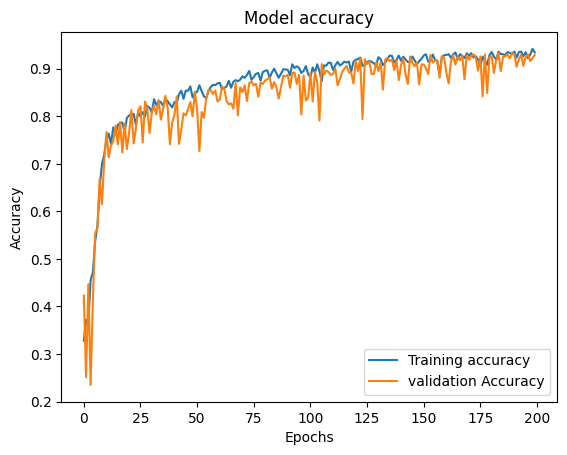

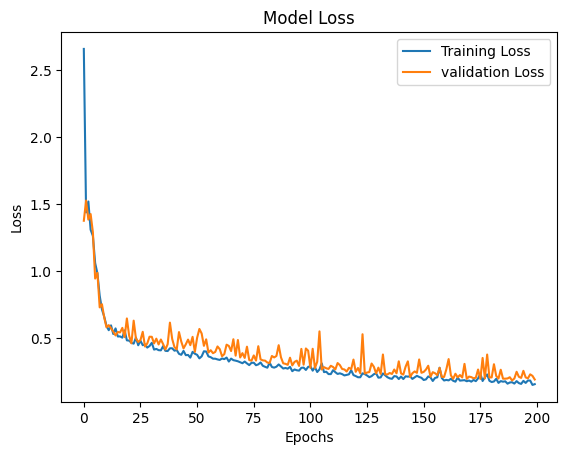

In [25]:
y_test=np.array(y_test)
results = model.evaluate(X_test, oh.transform(y_test.reshape(1,-1).T).toarray())


print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")
#plot accuracy.....
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#plot loss...
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [28]:
print("Please enter the following parameters:")


param_1 = float(input("Temperature: "))
param_2 = float(input("Humidity: "))
param_3 = float(input("PM 2.5: "))
param_4 = float(input("PM 10: "))
param_5 = float(input("NO2: "))
param_6 = float(input("SO2: "))
param_7 = float(input("CO: "))
param_8 = float(input("Proximity: "))
param_9 = float(input("Population denisty: "))


user_input = np.array([param_1, param_2, param_3, param_4, param_5, param_6, param_7, param_8, param_9]).reshape(1, -1)

prediction = model.predict(user_input)

categories = ['good', 'moderate', 'hazardous', 'poor']

predicted_class_index = np.argmax(prediction)

# Print the predicted air quality
print(f"The predicted air quality is: {categories[predicted_class_index]}")


Please enter the following parameters:
Temperature: 29.8
Humidity: 59.1
PM 2.5: 5.2
PM 10: 17.9
NO2: 18.9
SO2: 9.2
CO: 1.72
Proximity: 6.3
Population denisty: 319
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The predicted air quality is: hazardous
